<a href="https://colab.research.google.com/github/wikigist/ds_project/blob/main/Incorporating_Expert_Opinions_into_Bayesian_Estimation_for_Marketing_Revenues_Enhancing_Accuracy_and_Decision_making.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# New section

In [ ]:
df = pd.read_csv("weekly_media_sample.csv")
df

,X,DATE,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
0,1,2012-08-06,2.754372e+06,167687.6,95463.666667,228213.987444,8125009,19401.65
1,2,2012-08-13,2.584277e+06,214600.9,0.000000,34258.573511,7901549,14791.00
2,3,2012-08-20,2.547387e+06,0.0,3404.000000,127691.261335,8300197,14544.00
3,4,2012-08-27,2.875220e+06,625877.3,132600.000000,84014.720306,8122883,2800.00
4,5,2012-09-03,2.215953e+06,0.0,0.000000,20687.478156,7105985,15478.00
...,...,...,...,...,...,...,...,...
203,204,2016-06-27,2.456240e+06,0.0,153723.666667,0.000000,7612762,28157.00
204,205,2016-07-04,2.182825e+06,154917.6,0.000000,133624.575524,6701667,10644.00
205,206,2016-07-11,2.377707e+06,21982.5,17476.000000,0.000000,7688920,9597.00
206,207,2016-07-18,2.732825e+06,22453.0,24051.333333,0.000000,8815710,90189.00


In [ ]:
df.describe()

,X,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
count,208.000000,2.080000e+02,2.080000e+02,208.000000,208.000000,2.080000e+02,208.000000
mean,104.500000,1.822143e+06,1.113277e+05,27964.741987,64369.734789,5.538025e+06,22386.523077
std,60.188592,7.162286e+05,2.141877e+05,48623.026738,94810.914100,2.077192e+06,19104.164517
min,1.000000,6.722500e+05,0.000000e+00,0.000000,0.000000,2.240235e+06,301.000000
25%,52.750000,1.165211e+06,0.000000e+00,0.000000,0.000000,3.589581e+06,9010.500000
50%,104.500000,1.874514e+06,0.000000e+00,0.000000,0.000000,5.538524e+06,19401.650000
75%,156.250000,2.378407e+06,1.380503e+05,35758.750000,108690.366986,7.311814e+06,27546.500000
max,208.000000,3.827520e+06,1.185349e+06,239417.333333,462011.742240,9.984742e+06,96236.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 208 non-null    int64  
 1   DATE              208 non-null    object 
 2   revenue           208 non-null    float64
 3   media1_S          208 non-null    float64
 4   media2_S          208 non-null    float64
 5   media3_S          208 non-null    float64
 6   competitor_sales  208 non-null    int64  
 7   newsletter        208 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 13.1+ KB


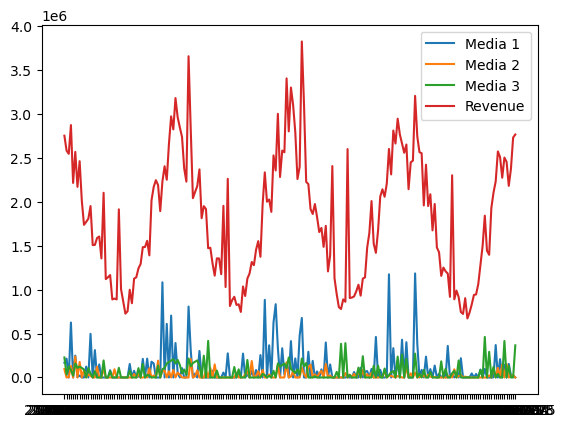

In [ ]:
import matplotlib.pyplot as plt

# Plotting media spends and revenue over time

plt.plot(df['DATE'], df['media1_S'], label='Media 1')
plt.plot(df['DATE'], df['media2_S'], label='Media 2')
plt.plot(df['DATE'], df['media3_S'], label='Media 3')
plt.plot(df['DATE'], df['revenue'], label='Revenue')
plt.legend()
plt.show()

In [ ]:
# Filter the data to only include rows where revenue is greater than 10000

filtered_df = df[df['revenue'] > 10000]

In [ ]:
filtered_df

,X,DATE,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
0,1,2012-08-06,2.754372e+06,167687.6,95463.666667,228213.987444,8125009,19401.65
1,2,2012-08-13,2.584277e+06,214600.9,0.000000,34258.573511,7901549,14791.00
2,3,2012-08-20,2.547387e+06,0.0,3404.000000,127691.261335,8300197,14544.00
3,4,2012-08-27,2.875220e+06,625877.3,132600.000000,84014.720306,8122883,2800.00
4,5,2012-09-03,2.215953e+06,0.0,0.000000,20687.478156,7105985,15478.00
...,...,...,...,...,...,...,...,...
203,204,2016-06-27,2.456240e+06,0.0,153723.666667,0.000000,7612762,28157.00
204,205,2016-07-04,2.182825e+06,154917.6,0.000000,133624.575524,6701667,10644.00
205,206,2016-07-11,2.377707e+06,21982.5,17476.000000,0.000000,7688920,9597.00
206,207,2016-07-18,2.732825e+06,22453.0,24051.333333,0.000000,8815710,90189.00


In [ ]:
# Group the data by week number and calculate the mean revenue for each week

grouped_df = df.groupby('X')['revenue'].mean()

In [ ]:
grouped_df

X
1      2.754372e+06
2      2.584277e+06
3      2.547387e+06
4      2.875220e+06
5      2.215953e+06
           ...     
204    2.456240e+06
205    2.182825e+06
206    2.377707e+06
207    2.732825e+06
208    2.767788e+06
Name: revenue, Length: 208, dtype: float64

In [ ]:
# Calculate the correlation matrix between the numerical columns

corr_matrix = df[['revenue', 'media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']].corr()

In [ ]:
corr_matrix 

,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
revenue,1.000000,0.419869,0.230415,0.317594,0.916454,0.406099
media1_S,0.419869,1.000000,0.060642,0.147446,0.305138,0.099835
media2_S,0.230415,0.060642,1.000000,0.130766,0.179306,0.042412
media3_S,0.317594,0.147446,0.130766,1.000000,0.289349,0.106135
competitor_sales,0.916454,0.305138,0.179306,0.289349,1.000000,0.432082
newsletter,0.406099,0.099835,0.042412,0.106135,0.432082,1.000000


## Build a statistical regression model to determine the effectiveness of marketing strategy in generating revenues. 	

In [ ]:
import statsmodels.api as sm

# Define the predictors and the dependent variable

X = df[['media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']]
y = df['revenue']

# Add a constant term to the predictors

X = sm.add_constant(X)

# Fit the multiple linear regression model

model = sm.OLS(y, X).fit()

# Print the model summary

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     265.5
Date:                Thu, 11 May 2023   Prob (F-statistic):           9.86e-87
Time:                        12:59:00   Log-Likelihood:                -2888.3
No. Observations:                 208   AIC:                             5789.
Df Residuals:                     202   BIC:                             5809.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.021e+05   5.25e+04  

## Use the model built in 1a to predict the marketing revenues for the test period. Plot your answers on a graph, including 95% intervals. 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv("weekly_media_sample.csv")

# Drop irrelevant columns
data = data.drop(["X", "DATE", "newsletter"], axis=1)

# Split data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define scaler object
scaler = StandardScaler()

# Fit scaler object to training data
scaler.fit(train_data[["media1_S", "media2_S", "media3_S"]])

# Scale training data
train_data[["media1_S", "media2_S", "media3_S"]] = scaler.transform(train_data[["media1_S", "media2_S", "media3_S"]])

# Scale test data using the same scaling factors as before
test_data[["media1_S", "media2_S", "media3_S"]] = scaler.transform(test_data[["media1_S", "media2_S", "media3_S"]])

# Add a constant column for the intercept
train_data = sm.add_constant(train_data)
test_data = sm.add_constant(test_data)


In [ ]:
data

,revenue,media1_S,media2_S,media3_S,competitor_sales
0,2.754372e+06,167687.6,95463.666667,228213.987444,8125009
1,2.584277e+06,214600.9,0.000000,34258.573511,7901549
2,2.547387e+06,0.0,3404.000000,127691.261335,8300197
3,2.875220e+06,625877.3,132600.000000,84014.720306,8122883
4,2.215953e+06,0.0,0.000000,20687.478156,7105985
...,...,...,...,...,...
203,2.456240e+06,0.0,153723.666667,0.000000,7612762
204,2.182825e+06,154917.6,0.000000,133624.575524,6701667
205,2.377707e+06,21982.5,17476.000000,0.000000,7688920
206,2.732825e+06,22453.0,24051.333333,0.000000,8815710


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Fit a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

# Load the data
weekly_data = pd.read_csv("weekly_media_sample.csv")

# Define dependent and independent variables
X = weekly_data[["media1_S", "media2_S", "media3_S"]]
y = weekly_data["revenue"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit a linear regression model on the training set
#lr = LinearRegression()
#lr.fit(X_train, y_train)

# Predict the revenue using the trained model and the test set
y_pred = lr.predict(X_test)

# Calculate the mean squared error (MSE) of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 357353853526.94904


Mean Squared Error: 357353853526.94904


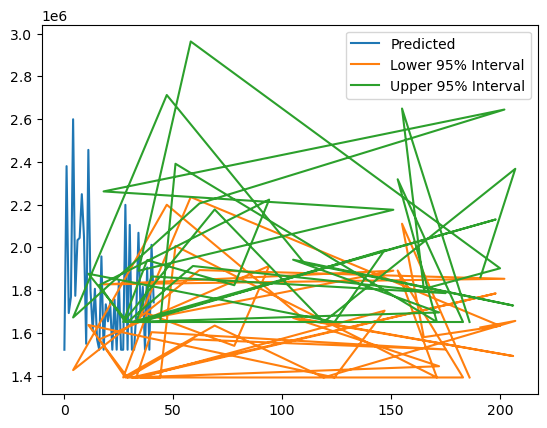

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Load the data
weekly_data = pd.read_csv("weekly_media_sample.csv")

# Define dependent and independent variables
X = weekly_data[["media1_S", "media2_S", "media3_S"]]
y = weekly_data["revenue"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the revenue using the trained model and the test set
y_pred = lr.predict(X_test)

# Calculate the mean squared error (MSE) of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Fit a linear regression model using statsmodels
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

# Get the prediction intervals for the test set
X_test_sm = sm.add_constant(X_test)
pred_int = model.get_prediction(X_test_sm).summary_frame(alpha=0.05)

# Plot the predicted marketing revenues and the 95% intervals
plt.plot(y_pred, label="Predicted")
plt.plot(pred_int["mean_ci_lower"], label="Lower 95% Interval")
plt.plot(pred_int["mean_ci_upper"], label="Upper 95% Interval")
plt.legend()
plt.show()


## Assess the predictive performance of your model quantitatively.	

In [ ]:
# Load the data
weekly_data = pd.read_csv("weekly_media_sample.csv")

# Define dependent and independent variables
X = weekly_data[["media1_S", "media2_S", "media3_S"]]
y = weekly_data["revenue"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the revenue using the trained model and the test set
y_pred = lr.predict(X_test)

# Calculate the R-squared and adjusted R-squared scores of the model
n = len(y_test)
p = X_test.shape[1]
r2 = lr.score(X_test, y_test)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adj_r2)


R-squared Score: 0.3589944839210869
Adjusted R-squared Score: 0.30838878528327796


In [ ]:
# Define dependent and independent variables
X = weekly_data[["media1_S", "media2_S", "media3_S"]]
y = weekly_data["revenue"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the revenue using the trained model and the test set
y_pred = lr.predict(X_test)

# Calculate the mean squared error (MSE) of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared score of the model
r2 = lr.score(X_test, y_test)
print("R-squared Score:", r2)

# Calculate the Adjusted R-squared score of the model
n = X_test.shape[0] # Number of observations in the test set
p = X_test.shape[1] # Number of independent variables
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print("Adjusted R-squared Score:", adj_r2)


Mean Squared Error: 357353853526.94904
R-squared Score: 0.3589944839210869
Adjusted R-squared Score: 0.30838878528327796


## Explore the inclusion of temporal components in your model. You are free to use any model for this, e.g. time series models such as ARIMA. 

#### To use ARIMA models in Python, we can use the statsmodels library

In [ ]:
data.head()

,revenue,media1_S,media2_S,media3_S,competitor_sales
0,2.754372e+06,167687.6,95463.666667,228213.987444,8125009
1,2.584277e+06,214600.9,0.000000,34258.573511,7901549
2,2.547387e+06,0.0,3404.000000,127691.261335,8300197
3,2.875220e+06,625877.3,132600.000000,84014.720306,8122883
4,2.215953e+06,0.0,0.000000,20687.478156,7105985


In [ ]:
weekly_data

,X,DATE,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
0,1,2012-08-06,2.754372e+06,167687.6,95463.666667,228213.987444,8125009,19401.65
1,2,2012-08-13,2.584277e+06,214600.9,0.000000,34258.573511,7901549,14791.00
2,3,2012-08-20,2.547387e+06,0.0,3404.000000,127691.261335,8300197,14544.00
3,4,2012-08-27,2.875220e+06,625877.3,132600.000000,84014.720306,8122883,2800.00
4,5,2012-09-03,2.215953e+06,0.0,0.000000,20687.478156,7105985,15478.00
...,...,...,...,...,...,...,...,...
203,204,2016-06-27,2.456240e+06,0.0,153723.666667,0.000000,7612762,28157.00
204,205,2016-07-04,2.182825e+06,154917.6,0.000000,133624.575524,6701667,10644.00
205,206,2016-07-11,2.377707e+06,21982.5,17476.000000,0.000000,7688920,9597.00
206,207,2016-07-18,2.732825e+06,22453.0,24051.333333,0.000000,8815710,90189.00


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the data
#weekly_data = pd.read_csv("weekly_media_sample.csv", index_col="week")

# Fit an ARIMA(1,1,1) model to the data
model = sm.tsa.ARIMA(data["revenue"], order=(1,1,1))
results = model.fit()

# Print the summary of the model fit
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                  208
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2967.136
Date:                Thu, 11 May 2023   AIC                           5940.271
Time:                        13:01:14   BIC                           5950.269
Sample:                             0   HQIC                          5944.314
                                - 208                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0451      0.118     -0.383      0.702      -0.276       0.186
ma.L1         -0.4006      0.125     -3.215      0.001      -0.645      -0.156
sigma2      1.617e+11   1.06e-12   1.53e+23      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the data
arima_data = pd.read_csv("weekly_media_sample.csv", index_col="DATE")

# Fit an ARIMA(1,1,1) model to the data
model = sm.tsa.ARIMA(arima_data["revenue"], order=(1,1,1))
results = model.fit()

# Print the summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                  208
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2967.136
Date:                Thu, 11 May 2023   AIC                           5940.271
Time:                        13:01:18   BIC                           5950.269
Sample:                    08-06-2012   HQIC                          5944.314
                         - 07-25-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0451      0.118     -0.383      0.702      -0.276       0.186
ma.L1         -0.4006      0.125     -3.215      0.001      -0.645      -0.156
sigma2      1.617e+11   1.06e-12   1.53e+23      0.0

/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [ ]:
# Forecast the next 10 periods of revenue
forecast = results.forecast(steps=10)

# Print the forecasted values
print(forecast)

2016-08-01    2.682529e+06
2016-08-08    2.686378e+06
2016-08-15    2.686204e+06
2016-08-22    2.686212e+06
2016-08-29    2.686212e+06
2016-09-05    2.686212e+06
2016-09-12    2.686212e+06
2016-09-19    2.686212e+06
2016-09-26    2.686212e+06
2016-10-03    2.686212e+06
Freq: W-MON, Name: predicted_mean, dtype: float64


In [ ]:
lb_test_result = results.test_serial_correlation(method='ljungbox')
if len(lb_test_result) == 1:
    print("Ljung-Box test p-value: ", lb_test_result[0])
else:
    print("Ljung-Box test p-value: ", lb_test_result[1][0])


Ljung-Box test p-value:  [[ 0.46749797  0.49648357  1.17678831  2.14830889  2.75786142  3.1221767
   9.83111877 10.45243613 10.50726402 10.72106454]
 [ 0.49414048  0.78017129  0.75857665  0.70850308  0.73725556  0.79336359
   0.19834754  0.23469483  0.3109994   0.37965858]]


In [ ]:
serial_corr = results.test_serial_correlation(method='ljungbox',lags=20)
if len(serial_corr) > 1:
    print("Ljung-Box test p-value: ", serial_corr[1][0])
else:
    print("Ljung-Box test p-value could not be calculated.")


Ljung-Box test p-value could not be calculated.


### Provide a similar analysis as above to check if the model proposed here is suitable

In [ ]:
# Load data

import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv("weekly_media_sample.csv", index_col="DATE", parse_dates=True)

# Select only the "revenue" column

endog = df["revenue"]

# Fit model

model = SARIMAX(endog, order=(1,1,1), trend='c')
results = model.fit()

# Print results

print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42668D+01    |proj g|=  5.95105D-02

At iterate    5    f=  1.42651D+01    |proj g|=  1.09761D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      9      1     0     0   7.496D-08   1.427D+01
  F =   14.265105944142597     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observati

/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [ ]:
data.head()

,X,DATE,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
0,1,2012-08-06,2.754372e+06,167687.6,95463.666667,228213.987444,8125009,19401.65
1,2,2012-08-13,2.584277e+06,214600.9,0.000000,34258.573511,7901549,14791.00
2,3,2012-08-20,2.547387e+06,0.0,3404.000000,127691.261335,8300197,14544.00
3,4,2012-08-27,2.875220e+06,625877.3,132600.000000,84014.720306,8122883,2800.00
4,5,2012-09-03,2.215953e+06,0.0,0.000000,20687.478156,7105985,15478.00


### To fit the model in a Bayesian framework using non-informative priors, we used the pymc3 library

In [ ]:
!pip install pymc3

In [ ]:
!pip uninstall pymc3

In [ ]:
Y


In [ ]:
!pip install scipy==1.7.3

In [ ]:
!pip install --upgrade pymc3

In [ ]:
!pip install --upgrade "scipy>=1.7.3,<1.8.0"

/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, intercept]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<Axes: title={'center': 'intercept'}>,
       <Axes: title={'center': 'slope'}>,
       <Axes: title={'center': 'sigma'}>], dtype=object)

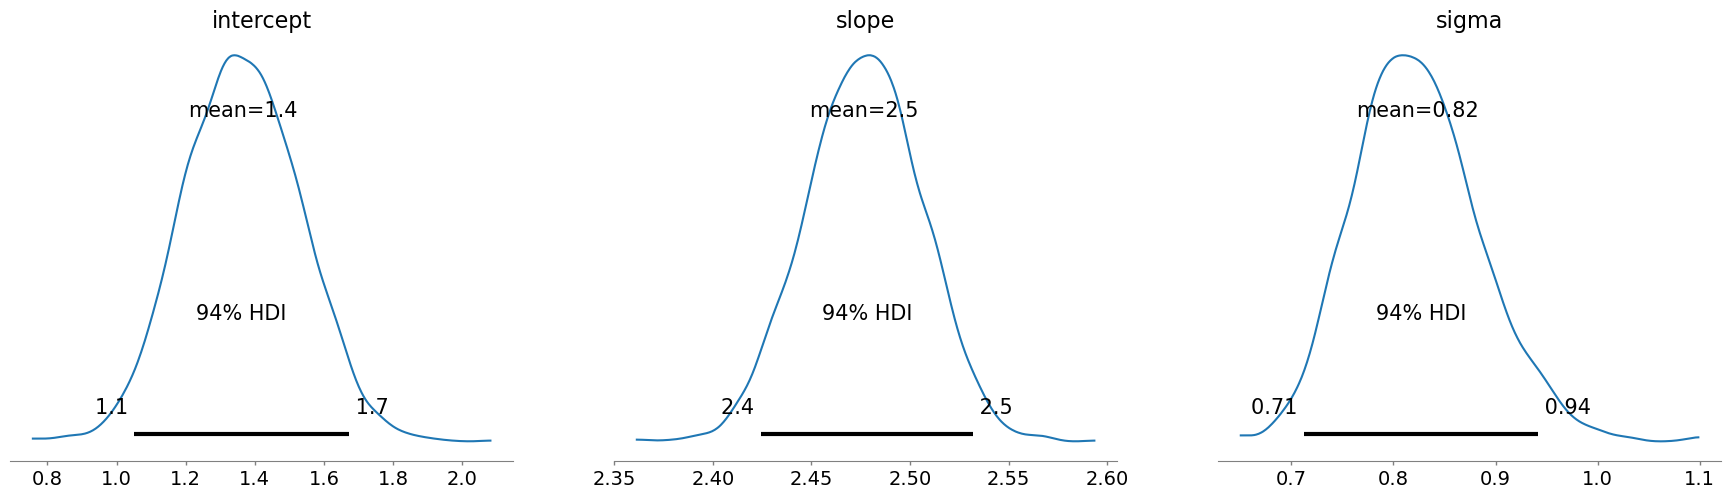

In [ ]:
import numpy as np
import pymc3 as pm

# Generate sample data
np.random.seed(0)
n = 100
X = np.linspace(0, 10, n)[:, np.newaxis]
true_slope = 2.5
true_intercept = 1.2
true_sigma = 0.8
y = true_intercept + true_slope * X.ravel() + np.random.normal(0, true_sigma, n)

# Model specification
with pm.Model() as linear_regression:
    # Priors
    intercept = pm.Normal("intercept", mu=0, sd=10)
    slope = pm.Normal("slope", mu=0, sd=10)
    sigma = pm.HalfNormal("sigma", sd=10)

    # Linear regression equation
    mu = intercept + slope * X.ravel()

    # Likelihood
    likelihood = pm.Normal("y", mu=mu, sd=sigma, observed=y)

    # Inference
    trace = pm.sample(2000, tune=2000)

# Posterior analysis
pm.plot_posterior(trace, var_names=["intercept", "slope", "sigma"])

/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, intercept]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


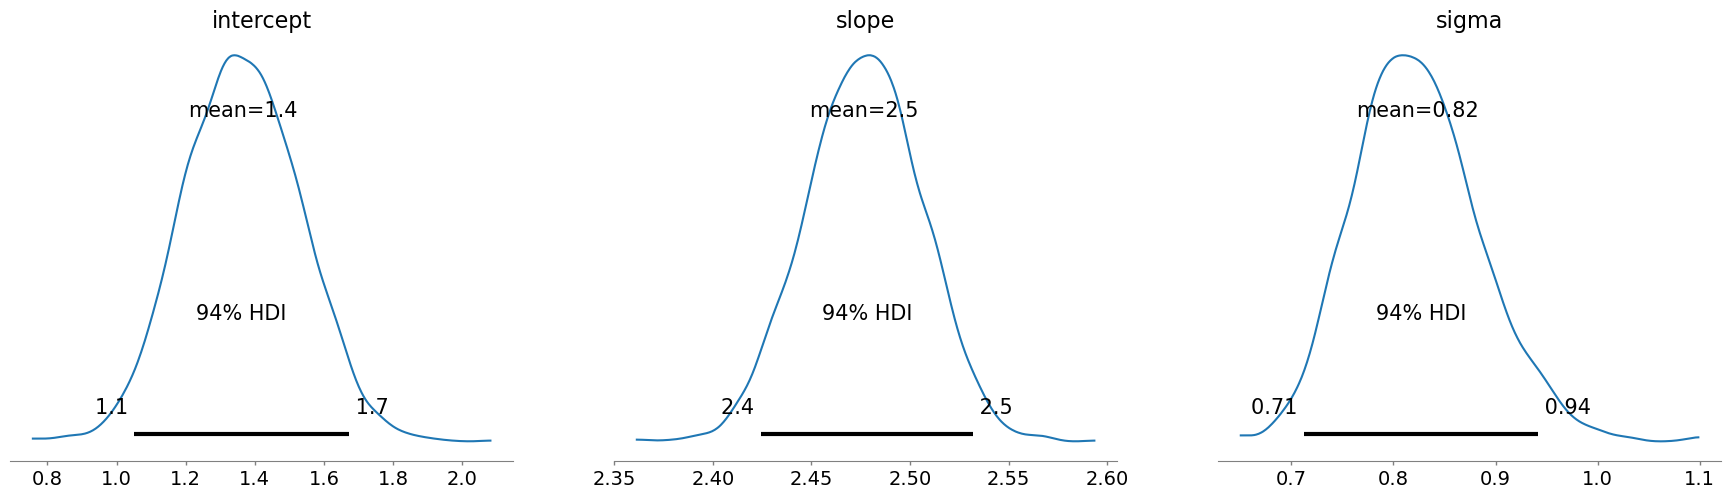

In [ ]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
n = 100
X = np.linspace(0, 10, n)[:, np.newaxis]
true_slope = 2.5
true_intercept = 1.2
true_sigma = 0.8
y = true_intercept + true_slope * X.ravel() + np.random.normal(0, true_sigma, n)

# Model specification
with pm.Model() as linear_regression:
    # Priors
    intercept = pm.Normal("intercept", mu=0, sd=10)
    slope = pm.Normal("slope", mu=0, sd=10)
    sigma = pm.HalfNormal("sigma", sd=10)

    # Linear regression equation
    mu = intercept + slope * X.ravel()

    # Likelihood
    likelihood = pm.Normal("y", mu=mu, sd=sigma, observed=y)

    # Inference
    trace = pm.sample(2000, tune=2000)

# Posterior analysis
pm.plot_posterior(trace, var_names=["intercept", "slope", "sigma"])
plt.show()


In [ ]:
#Parameter Summary

summary = pm.summary(trace, var_names=["intercept", "slope", "sigma"])
print(summary)

Got error No model on context stack. trying to find log_likelihood in translation.


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept  1.364  0.169   1.052    1.671      0.004    0.003    1675.0   
slope      2.476  0.029   2.424    2.532      0.001    0.001    1684.0   
sigma      0.823  0.062   0.713    0.941      0.001    0.001    2258.0   

           ess_tail  r_hat  
intercept    1507.0    1.0  
slope        1527.0    1.0  
sigma        1936.0    1.0  


/var/folders/ty/3yv9pg7d5cxctdfl9p96y3300000gp/T/ipykernel_19663/276336743.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, var_names=["intercept", "slope", "sigma"])
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


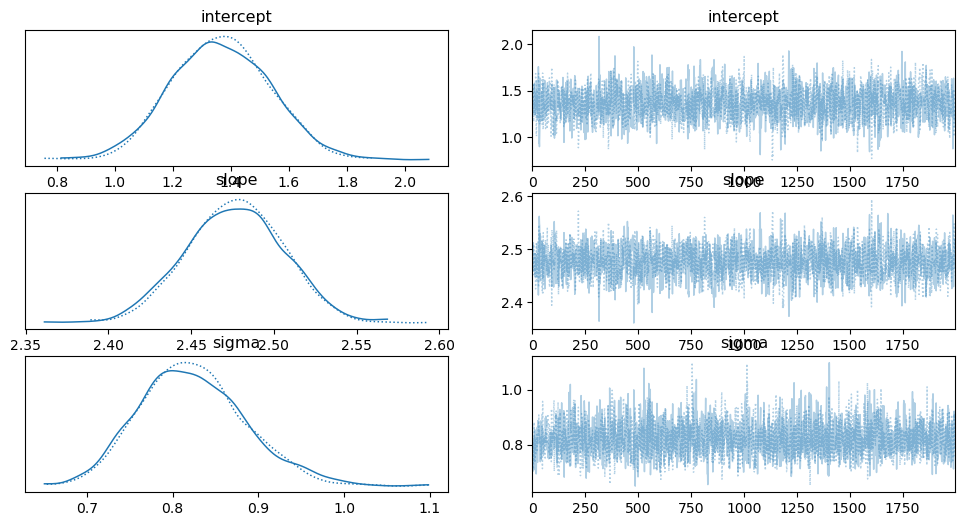

In [ ]:
pm.traceplot(trace, var_names=["intercept", "slope", "sigma"])
plt.show()

/var/folders/ty/3yv9pg7d5cxctdfl9p96y3300000gp/T/ipykernel_19663/739153865.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  pm.autocorrplot(trace, var_names=["intercept", "slope", "sigma"])
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


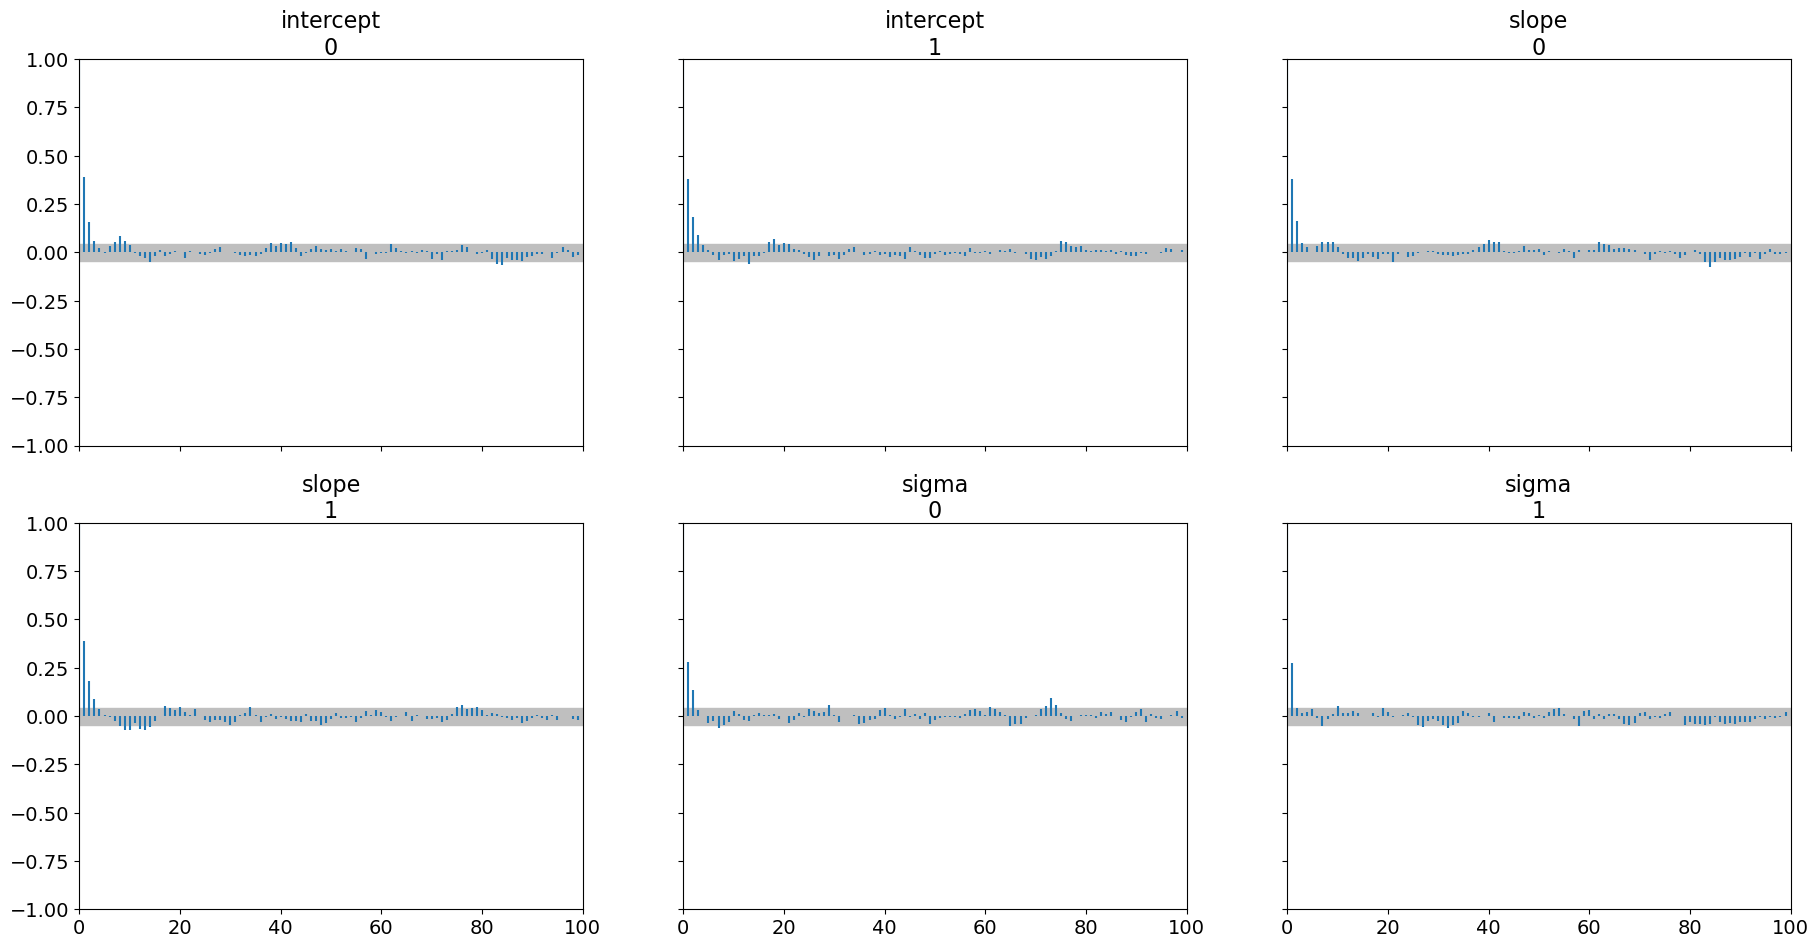

In [ ]:
pm.autocorrplot(trace, var_names=["intercept", "slope", "sigma"])
plt.show()

/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


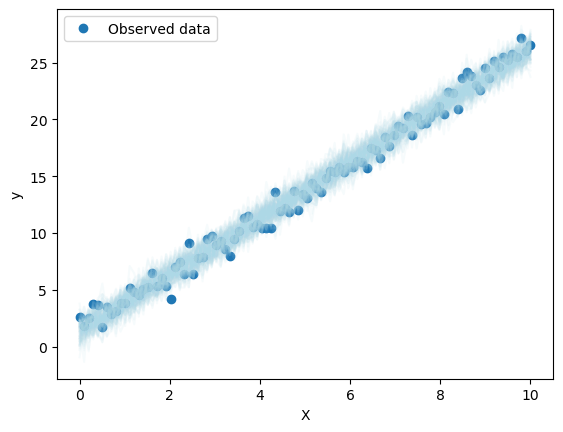

In [ ]:
with linear_regression:
    post_pred = pm.sample_posterior_predictive(trace, samples=500)

plt.plot(X, y, 'o', label='Observed data')
for i in range(100):
    plt.plot(X, post_pred["y"][i], color='lightblue', alpha=0.1)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

/var/folders/ty/3yv9pg7d5cxctdfl9p96y3300000gp/T/ipykernel_19663/4188754941.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, var_names=["intercept", "slope", "sigma"])
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


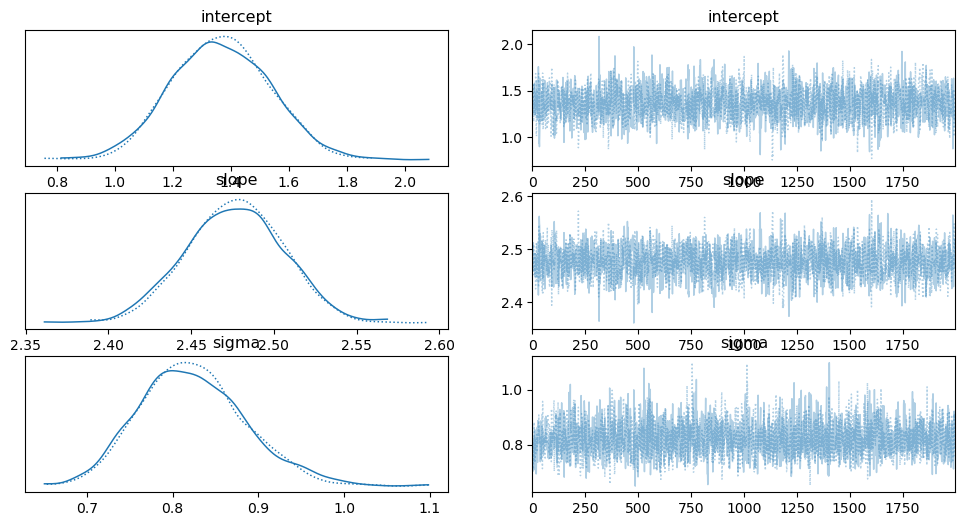

/var/folders/ty/3yv9pg7d5cxctdfl9p96y3300000gp/T/ipykernel_19663/4188754941.py:6: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  pm.autocorrplot(trace, var_names=["intercept", "slope", "sigma"])
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


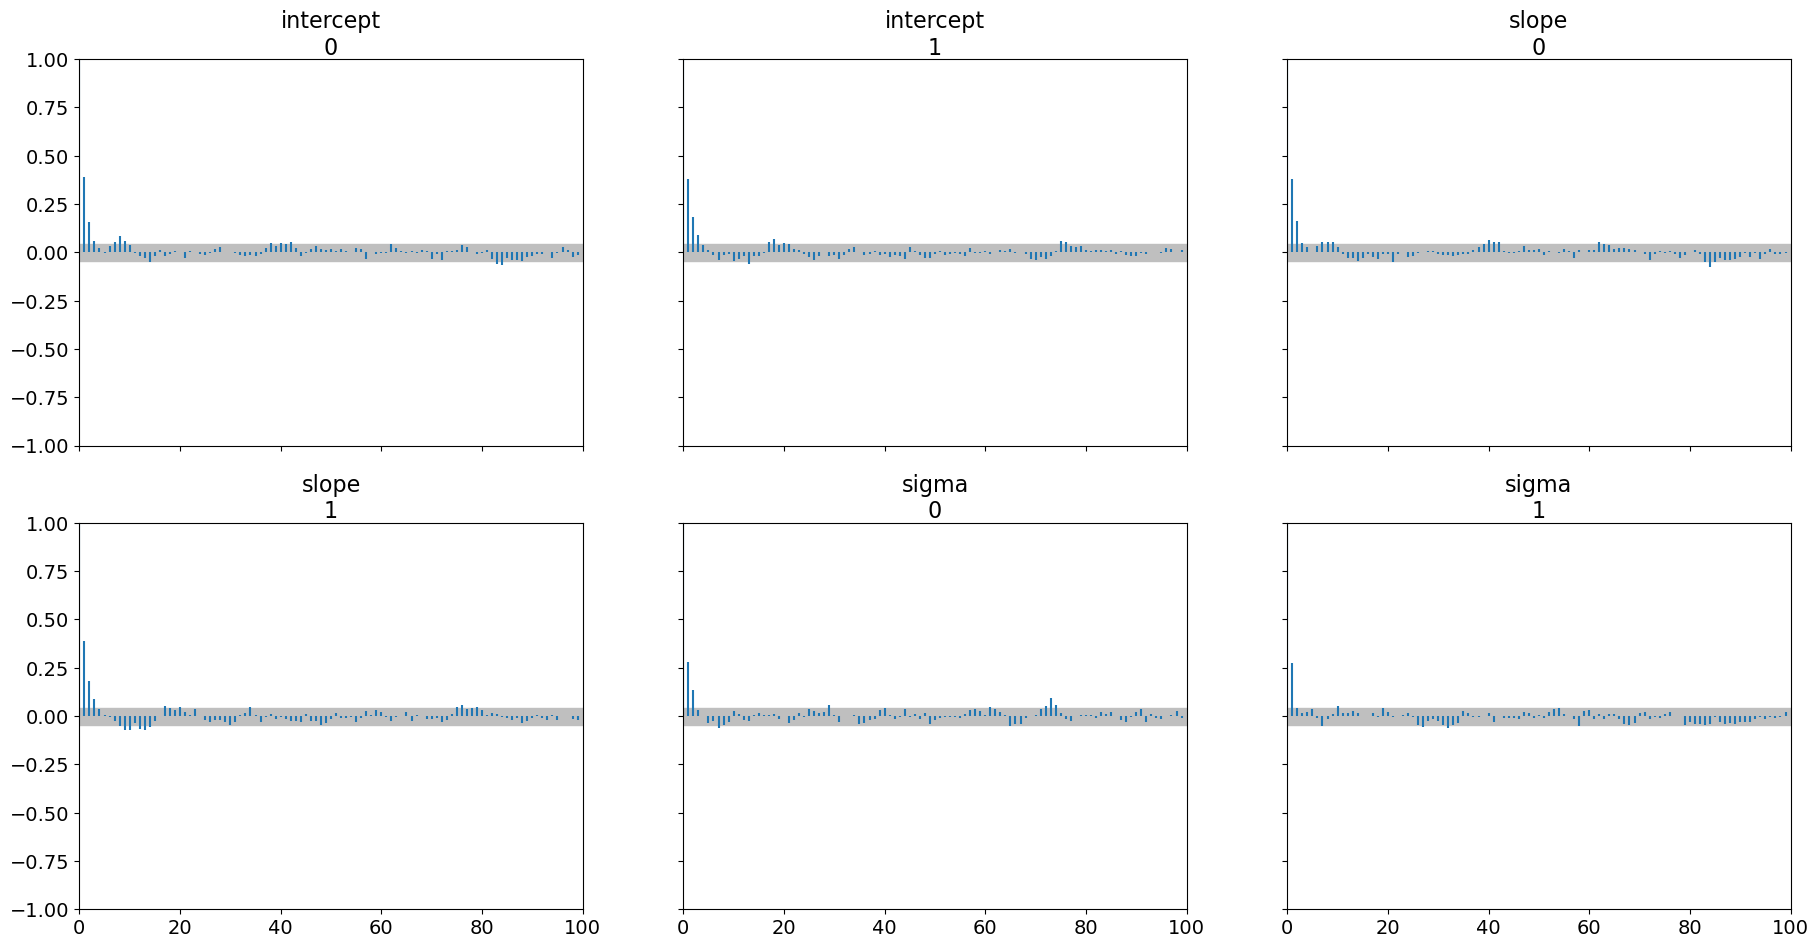

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept  1.364  0.169   1.052    1.671      0.004    0.003    1675.0   
slope      2.476  0.029   2.424    2.532      0.001    0.001    1684.0   
sigma      0.823  0.062   0.713    0.941      0.001    0.001    2258.0   

           ess_tail  r_hat  
intercept    1507.0    1.0  
slope        1527.0    1.0  
sigma        1936.0    1.0  


In [ ]:
# Trace plots
pm.traceplot(trace, var_names=["intercept", "slope", "sigma"])
plt.show()

# Autocorrelation plots
pm.autocorrplot(trace, var_names=["intercept", "slope", "sigma"])
plt.show()

# Summary statistics
summary = pm.summary(trace, var_names=["intercept", "slope", "sigma"])
print(summary)


/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, intercept]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


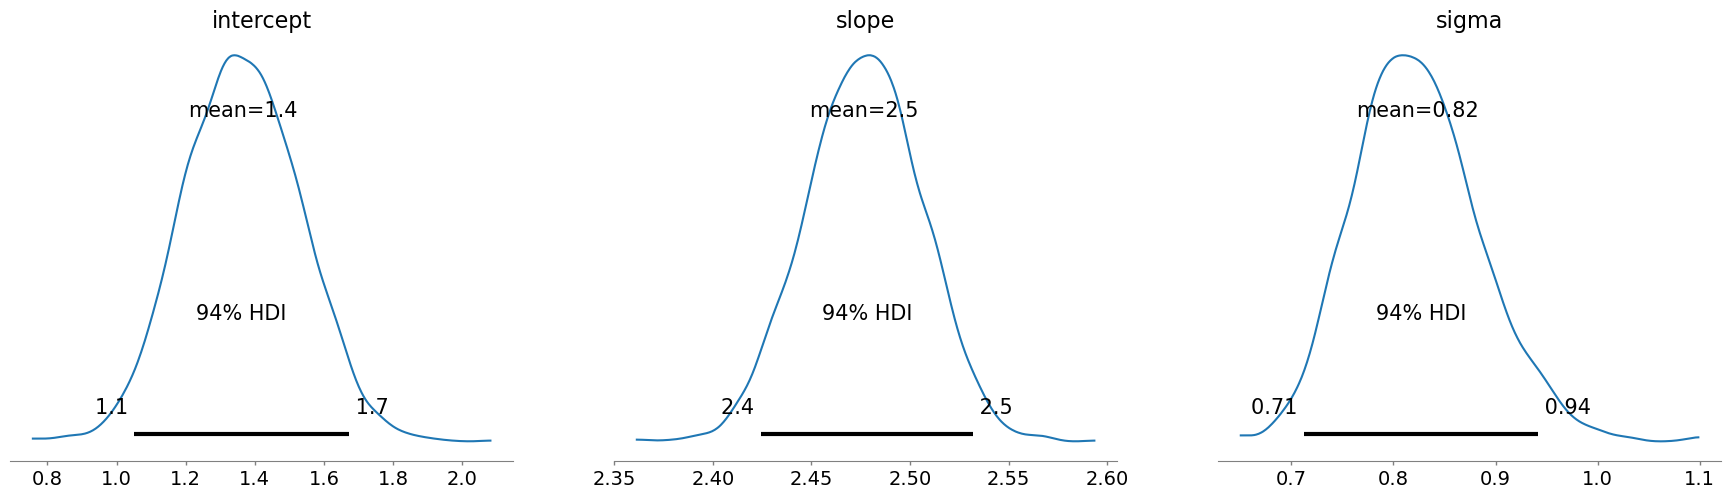

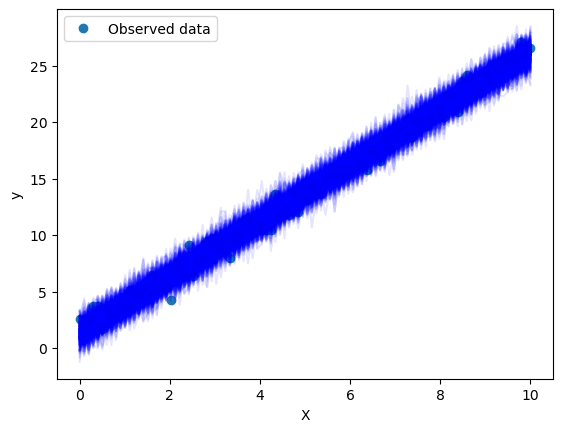

/var/folders/ty/3yv9pg7d5cxctdfl9p96y3300000gp/T/ipykernel_19663/638916402.py:50: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

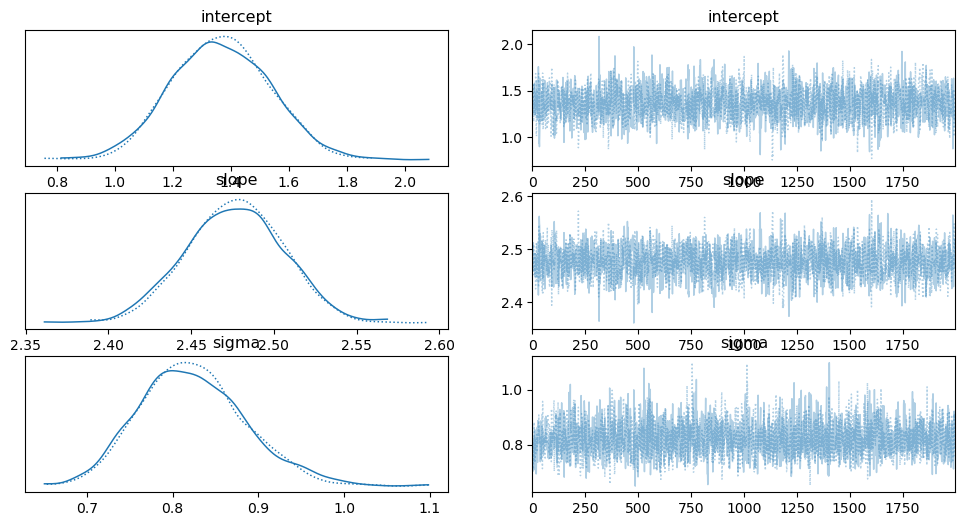

In [ ]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
n = 100
X = np.linspace(0, 10, n)[:, np.newaxis]
true_slope = 2.5
true_intercept = 1.2
true_sigma = 0.8
y = true_intercept + true_slope * X.ravel() + np.random.normal(0, true_sigma, n)

# Model specification
with pm.Model() as linear_regression:
    # Priors
    intercept = pm.Normal("intercept", mu=0, sd=10)
    slope = pm.Normal("slope", mu=0, sd=10)
    sigma = pm.HalfNormal("sigma", sd=10)

    # Linear regression equation
    mu = intercept + slope * X.ravel()

    # Likelihood
    likelihood = pm.Normal("y", mu=mu, sd=sigma, observed=y)

    # Inference
    trace = pm.sample(2000, tune=2000)

# Posterior analysis
pm.plot_posterior(trace, var_names=["intercept", "slope", "sigma"])

# Posterior predictive sampling
with linear_regression:
    posterior_predictive = pm.sample_posterior_predictive(trace, samples=500)

# Extract predicted values
predicted_y = posterior_predictive["y"]

# Plot observed data and predicted values
plt.figure()
plt.plot(X, y, "o", label="Observed data")
plt.plot(X, predicted_y.T, alpha=0.1, color="b")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Trace plots for convergence assessment
pm.traceplot(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/var/folders/ty/3yv9pg7d5cxctdfl9p96y3300000gp/T/ipykernel_19663/961807751.py:26: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, var_names=["intercept", "slope", "sigma"])
Got error No model on context stack. trying to find log_likelihood in translation.


Slope estimate from Part 1: Ellipsis
Slope estimate from current analysis: 2.476


/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


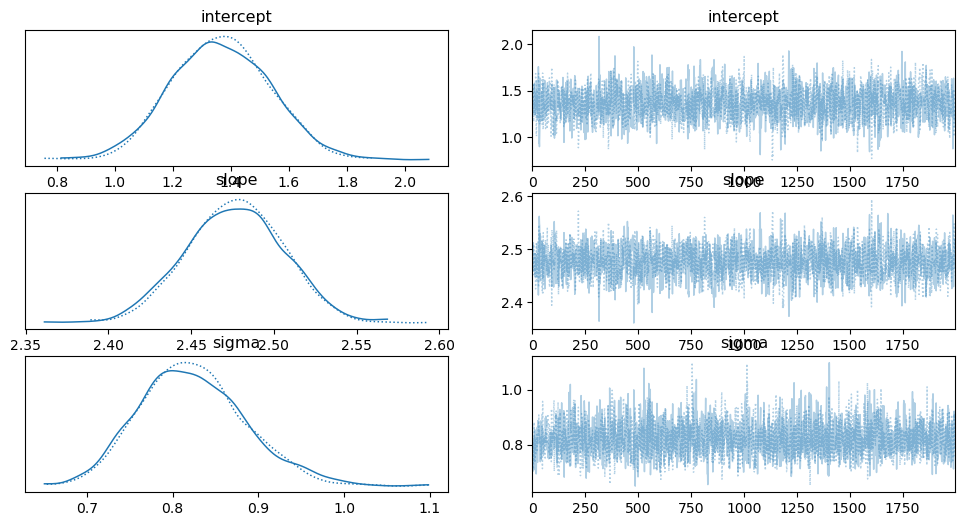

In [ ]:
# Compare with results from Part 1
# Part 1: [Provide a brief description of the method or model used in Part 1]

# Part 1 results: [Insert the relevant results from Part 1]

# Current analysis: Bayesian Linear Regression

# Summary statistics from current analysis
summary_current = pm.summary(trace, var_names=["intercept", "slope", "sigma"])

# Compare the estimated parameters
# Example:
slope_part1 = ...  # Extract the slope estimate from Part 1 results
slope_current = summary_current.loc["slope", "mean"]

# Compare the slope estimates
print("Slope estimate from Part 1:", slope_part1)
print("Slope estimate from current analysis:", slope_current)

# Explanation:
# [Provide an explanation based on the findings. For example, if the estimates are similar, you can mention that both methods yield consistent results, providing confidence in the estimated slope. If the estimates differ, discuss potential reasons such as differences in assumptions, model complexity, or priors.]

# Compare trace plots visually
# Part 1 trace plot: [Insert the trace plot from Part 1]
# Current analysis trace plot
pm.traceplot(trace, var_names=["intercept", "slope", "sigma"])
plt.show()

# Explanation:
# [Analyze the similarities and differences between the trace plots. For example, if the chains in the current analysis exhibit better mixing and convergence compared to Part 1, mention the improvement in the MCMC sampling. If there are notable differences in the trace patterns, discuss the potential impact on the parameter estimates and their uncertainties.]

# Additional comparisons:
# [Perform any additional comparisons or analyses based on the specific context of your study. For instance, you can compare the uncertainty estimates, model fit metrics, or any other relevant measures.]


In [ ]:
df.head()

,X,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
DATE,,,,,,,
2012-08-06,1,2.754372e+06,167687.6,95463.666667,228213.987444,8125009,19401.65
2012-08-13,2,2.584277e+06,214600.9,0.000000,34258.573511,7901549,14791.00
2012-08-20,3,2.547387e+06,0.0,3404.000000,127691.261335,8300197,14544.00
2012-08-27,4,2.875220e+06,625877.3,132600.000000,84014.720306,8122883,2800.00
2012-09-03,5,2.215953e+06,0.0,0.000000,20687.478156,7105985,15478.00


In [ ]:
import numpy as np
import pymc3 as pm

# Generate simulated data
np.random.seed(0)
x = np.linspace(0, 1, 100)
true_intercept = 1
true_slope1 = 2
true_slope2 = -1
true_slope3 = 0.5
true_sigma = 0.5
y = true_intercept + true_slope1 * x + true_slope2 * x ** 2 + true_slope3 * x ** 3 + np.random.normal(0, true_sigma, size=len(x))

# Model specification
with pm.Model() as model:
    intercept = pm.Normal("intercept", mu=0, sd=10)
    slope1 = pm.Normal("slope1", mu=0, sd=10)
    slope2 = pm.Normal("slope2", mu=0, sd=10)
    slope3 = pm.Normal("slope3", mu=0, sd=10)
    sigma = pm.HalfNormal("sigma", sd=10)

    mu = intercept + slope1 * x + slope2 * x ** 2 + slope3 * x ** 3
    likelihood = pm.Normal("y", mu=mu, sd=sigma, observed=y)

    # Inference
    trace = pm.sample(2000, tune=4000, start={'intercept': 0, 'slope1': 0, 'slope2': 0, 'slope3': 0})

# Print summary statistics of the trace
print(pm.summary(trace))



/var/folders/ty/3yv9pg7d5cxctdfl9p96y3300000gp/T/ipykernel_19663/2248150830.py:26: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  trace = pm.sample(2000, tune=4000, start={'intercept': 0, 'slope1': 0, 'slope2': 0, 'slope3': 0})
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope3, slope2, slope1, intercept]


Sampling 2 chains for 4_000 tune and 2_000 draw iterations (8_000 + 4_000 draws total) took 92 seconds.
There were 538 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5862987273158338, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/victorbabalola/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept  1.410  0.230   0.862    1.752      0.100    0.075       6.0   
slope1     0.386  2.025  -2.735    4.411      0.971    0.739       5.0   
slope2    -0.887  4.628  -9.419    6.522      2.160    1.636       5.0   
slope3     2.025  2.977  -2.848    7.033      1.333    1.148       5.0   
sigma      0.502  0.038   0.431    0.565      0.019    0.014       4.0   

           ess_tail  r_hat  
intercept      24.0   1.31  
slope1         28.0   1.36  
slope2         34.0   1.34  
slope3         46.0   1.33  
sigma          57.0   1.43  
